# Introducción a la inferencia causal con Python

*Esta notebook fue creada originalmente como un blog post por [Raúl E. López Briega](https://relopezbriega.com.ar/) en [Matemáticas, Analisis de datos y Python](https://relopezbriega.github.io). El contenido esta bajo la licencia BSD.*

<img alt="Introducción a la inferencia causal con Python" title="Introducción a la inferencia causal con Python" src="https://relopezbriega.github.io/images/causal.jpg" width="60%" height="60%">

> "...lo que llamamos azar es nuestra ignorancia de la compleja maquinaria de la causalidad"

**[Jorge Luis Borges](https://es.wikipedia.org/wiki/Jorge_Luis_Borges)**

Saludos!

*Este post fue escrito por [Raúl e. López Briega](https://relopezbriega.github.io/) utilizando [Jupyter notebook](https://jupyter.org/). Pueden descargar este [notebook](https://github.com/relopezbriega/relopezbriega.github.io/blob/master/downloads/CausalPy.ipynb) o ver su version estática en [nbviewer](https://nbviewer.ipython.org/github/relopezbriega/relopezbriega.github.io/blob/master/downloads/CausalPy.ipynb).*

## Introducción

<strong><span style="font-size:16px;">¿Por qué?</span></strong>...Esta eterna pregunta es una de las más fundamentales. La solemos formular incontables veces al día! El ser humano parece tener una infinita curiosidad por entender el por qué pasan las cosas, y nuestro cerebro parece estar especialmente diseñado para encontrar esas causas...o inventarlas.

La [causalidad](https://es.wikipedia.org/wiki/Causalidad_(filosof%C3%ADa)) es la conexión más fundamental en el universo. Sin ella, no hay responsabilidad moral: ninguno de nuestros pensamientos estaría relacionado con nuestras acciones y ninguna de nuestras acciones con consecuencias. Tampoco tendríamos un sistema legal porque la culpa reside solo en alguien que ha causado lesiones o daños. No habría ciencia ni tecnología. 

[Richard feynman](https://es.wikipedia.org/wiki/Richard_Feynman) definía a la Ciencia como un método para intentar responder preguntas del tipo <em>"Si hago esto, ¿qué pasará?"</em>. Ciencia no es sobre belleza, verdad, justicia, sabiduría o ética; es algo eminemente práctico. Es sobre realizar experimentos, probar, ver los resultados y adquirir la mayor cantidad información de esas experiencias. Desde pequeños, aprendemos que el mundo no está compuesto solo de datos o hechos; sino que éstos hechos están interconectados por una intrincada red de relaciones de <em>causa-efecto</em>.
Cualquier intervención que hagamos en el mundo que nos rodea se basa en la existencia de conexiones causales que son al menos predecibles en cierto grado. Es la [causalidad](https://es.wikipedia.org/wiki/Causalidad_(filosof%C3%ADa)) la base de esta predicción y también la explicación.


## Escalera del pensamiento causal

Según [Judea Pearl](https://es.wikipedia.org/wiki/Judea_Pearl), uno de los padres de la formalización del razonamiento [causal](https://es.wikipedia.org/wiki/Causalidad_(filosof%C3%ADa)), nuestra habilidad para organizar el conocimiento sobre el mundo que nos rodea en <em>causas y efectos</em>, se basa en 3 habilidades cognitivas: <strong><em>ver, hacer e imaginar</em></strong>. Para explicar como estas habilidades nos ayudan a construir las explicaciones causales, recurre a la metáfora de una escalera. 

<img alt="Introducción a la inferencia causal con Python" title="Introducción a la inferencia causal con Python" src="https://relopezbriega.github.io/images/Causal.png" width="80%" height="80%">

El primero escalón, <strong><em>ver u observar</em></strong>, implica la detección de regularidades en nuestro ambiente y es compartida por muchos animales. El segundo escalón, <strong><em>hacer</em></strong>, implica predecir el (los) efecto (s)
de alteraciones deliberadas del medio ambiente y elegir entre éstas alteraciones para producir un resultado deseado. Solo un pequeño puñado de especies han demostrado elementos de esta habilidad. El uso de herramientas, siempre que sea intencional y no solo accidental, podría tomarse como una señal de alcanzar este segundo nivel. Sin embargo, incluso los usuarios de herramientas no necesariamente poseen una <em>"teoría"</em> de su herramienta que les dice por qué funciona y qué hacer cuando no lo hace. Para eso, se debe haber alcanzado un nivel de comprensión más alto, eso lo permite <strong><em>imaginar</em></strong>. Fue principalmente este tercer nivel el que nos preparó para nuevas revoluciones en agricultura y ciencia y condujeron a un repentino y drástico cambio en el impacto de nuestra especie en el planeta.


## La paradoja de Simpson

## Diagramas causales


## Interventions and Counterfactuals

## The Gold Standard: Randomized Experiment

https://causalinference.gitlab.io/causal-reasoning-book-chapter1/

Why causal reasoning? The gap between prediction and decision-making

https://causalinference.gitlab.io/kdd-tutorial/intro.html

Four steps of Causal Reasoning

In [8]:
# <!-- collapse=True -->
# Importando las librerías que vamos a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dowhy.api
from dowhy.do_why import CausalModel
import dowhy.datasets
import seaborn as sns

# graficos incrustados
%matplotlib notebook

In [2]:
N = 100000
n = 30000

# normally, ctr is independent of title_length
title_length = np.random.choice(range(25), size=N) + 1
click_through_rate = np.random.beta(5, 100, size=N)

# but one quirky person prefers titles in a much narrower range, and is especially talented
title_length_2 = np.random.normal(13, 3 ,size=n).astype(int)
click_through_rate_2 = np.random.beta(10, 100, size=n)

# let's concatenate these together
all_title_lengths = np.array(list(title_length) + list(title_length_2))
all_click_rates = np.array(list(click_through_rate) + list(click_through_rate_2))

df = pd.DataFrame({'click_through_rate': all_click_rates, 
                   'title_length': all_title_lengths, 
                   'author': [1]*N + [0]*n})

# restrict down to where there's enough data
df = df[df.title_length > 0][df.title_length < 25]

/home/raul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<IPython.core.display.Javascript object>


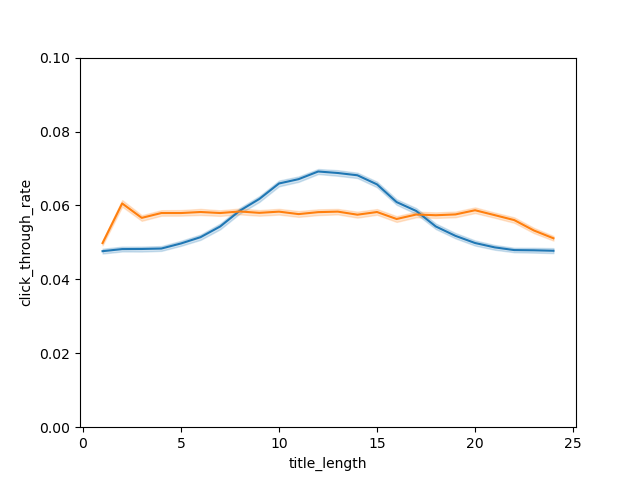

In [4]:
sns.lineplot(data=df, x='title_length', y='click_through_rate'); plt.ylim(0, 0.1)

In [5]:
causal_df = df.causal.do('title_length', 
                          method='weighting', 
                          variable_types={'title_length': 'd', 
                                          'click_through_rate': 'c', 
                                          'author': 'd'},
                          outcome='click_through_rate',
                          common_causes=['author'])

INFO:dowhy.do_why:Model to find the causal effect of treatment ['title_length'] on outcome ['click_through_rate']
INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['U', 'author']


WARN: Do you want to continue by ignoring these unobserved confounders? [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.do_sampler:Using WeightingSampler for do sampling.
INFO:dowhy.do_sampler:Caution: do samplers assume iid data.
INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [6]:
sns.lineplot(data=causal_df, x='title_length', y='click_through_rate'); plt.ylim(0, 0.1)

In [10]:
# Load some sample data
data = dowhy.datasets.linear_dataset(
    beta=10,
    num_common_causes=5,
    num_instruments=2,
    num_samples=10000,
    treatment_is_binary=True)

In [11]:
# With graph
model=CausalModel(
        data = df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        graph=data["gml_graph"]
        )

INFO:dowhy.do_why:Model to find the causal effect of treatment ['v'] on outcome ['y']


INFO:dowhy.causal_graph:Using Matplotlib for plotting


<IPython.core.display.Javascript object>


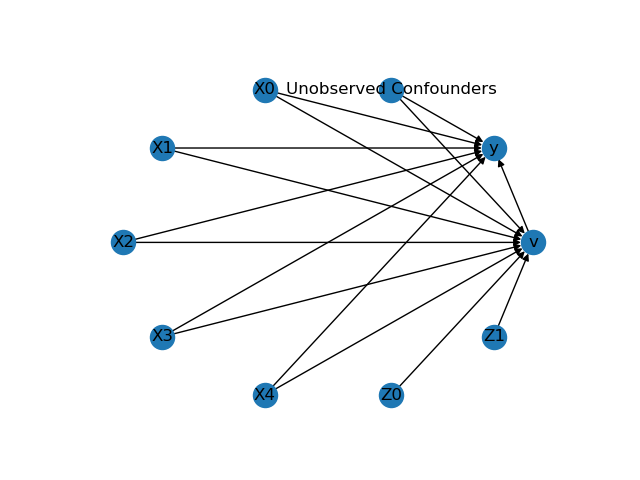

In [12]:
model.view_model()

In [13]:
identified_estimand = model.identify_effect()
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['Unobserved Confounders', 'X1', 'X4', 'X2', 'X3', 'X0']


WARN: Do you want to continue by ignoring these unobserved confounders? [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:['Z1', 'Z0']


Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
d                 
──(Expectation(y))
dv                
Estimand assumption 1, Unconfoundedness: If U→v and U→y then P(y|v,,U) = P(y|v,)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, Z1)/Derivative(v, Z1))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→Z1,Z0)
Estimand assumption 2, Exclusion: If we remove {Z1,Z0}→v, then ¬(Z1,Z0→y)



In [14]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['Unobserved Confounders', 'X1', 'X4', 'X2', 'X3', 'X0']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:['Z1', 'Z0']


Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
d                 
──(Expectation(y))
dv                
Estimand assumption 1, Unconfoundedness: If U→v and U→y then P(y|v,,U) = P(y|v,)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, Z1)/Derivative(v, Z1))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→Z1,Z0)
Estimand assumption 2, Exclusion: If we remove {Z1,Z0}→v, then ¬(Z1,Z0→y)



In [16]:
# Without graph
model= CausalModel(
        data=df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        common_causes=data["common_causes_names"],
        effect_modifiers=data["effect_modifier_names"])

KeyError: 'effect_modifier_names'